### Least Square Method on inbuilt data

In [12]:
#importing all the required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [14]:
# importing data 
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [21]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [22]:
#seperating features and target variables from the data
features = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'])
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
#identifying the number of rows and columns
features.shape

(506, 13)

In [24]:
#assigning a target values to target variable 
target = pd.DataFrame(target, columns=['Target'])
target.head()

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [46]:
#The baseline(naive) model using mean of the target
# identifying the overall description of target variable
target.describe()

,Target
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [26]:
#identifying the mean of target variable 
mean_output = target['Target'].mean()
mean_output

22.532806324110698

In [50]:
#identifying the error occured in a dataset from prediction to actual B0
error = pd.Series(mean_output - target['Target'])
error

0      -1.467194
1       0.932806
2     -12.167194
3     -10.867194
4     -13.667194
         ...    
501     0.132806
502     1.932806
503    -1.367194
504     0.532806
505    10.632806
Name: Target, Length: 506, dtype: float64

In [53]:
#Squared Error identifying the error occured between predicted and actual values B1
squared_error = pd.Series(error)**2
print(squared_error)

0        2.152657
1        0.870128
2      148.040602
3      118.095898
4      186.792183
          ...    
501      0.017638
502      3.735740
503      1.869219
504      0.283883
505    113.056570
Name: Target, Length: 506, dtype: float64


In [54]:
#getting a sum of all the squared error that is RSS
sum_squared_error = np.sum(squared_error)
print(sum_squared_error)

42716.29541501976


If you consider mean as your prediction then the Sum Squared Error is 42716.295

<AxesSubplot:ylabel='Frequency'>

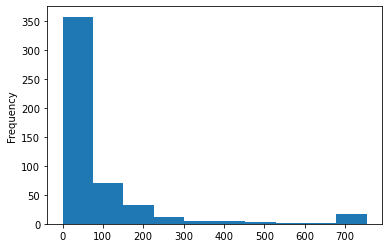

In [29]:
squared_error.plot(kind = 'hist')

#### Now I AM Going to Do some Smart Work - Machine Intelligence

In [30]:
## Using the Least Square method

In [57]:
# taking the feature column and target column
X = features[['RM']]
y = target[['Target']]

In [58]:
print(X.shape, y.shape)

(506, 1) (506, 1)


In [64]:
#by adding constant to the column we get constant for coef of x 
X = sm.add_constant(X)

In [65]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [66]:
linear_regression = sm.OLS(y,X)

In [67]:
#Estimation of coefficients
model = linear_regression.fit()

In [68]:
# Run this cell in case if you want to run through smf module
# data_sm = pd.DataFrame(np.vstack((X.RM.values, y.Target.values))).T
# data_sm.columns = ['RM', 'Target']
# data_sm.head()

In [69]:
#In case if you want to use smf
# linear_regression = smf.ols(formula='Target ~ RM', data=data_sm)
# model = linear_regression.fit()

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           2.49e-74
Time:                        15:56:05   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Let us compare the results

In [71]:
predicted_values = model.predict(X)

In [72]:
SSE_on_mean = np.sum((target['Target'] - target['Target'].mean())**2)
SSE_on_OLS = np.sum((target['Target'] - predicted_values)**2)

In [73]:
print('Error using Mean : ',SSE_on_mean)
print('Error using OLS : ', SSE_on_OLS)

Error using Mean :  42716.29541501976
Error using OLS :  22061.8791962118


<AxesSubplot:ylabel='Frequency'>

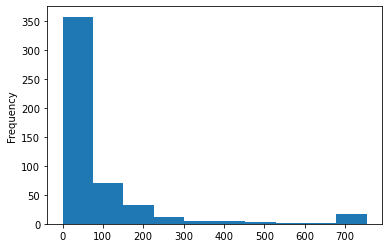

In [74]:
squared_error = pd.Series((target['Target'] - target['Target'].mean()))**2
squared_error.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

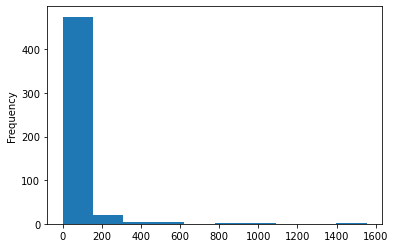

In [75]:
squared_error_ols = pd.Series((target['Target'] - predicted_values))**2
squared_error_ols.plot(kind = 'hist')

In [76]:
# Guess this is what ???
(SSE_on_mean-SSE_on_OLS)/SSE_on_mean

0.483525455991334